# LinearRegression AND DecisionTreeRegressor

In [107]:
# Import necessary modules
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns


from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score



 
df = pd.read_csv("E:\Major project\Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [78]:
#Removing null values
df['salary']=df['salary'].fillna(0)

In [79]:
feat=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
for ft in feat:
    df_ft='ft'+'_'+ft
    df_ft=pd.get_dummies(df[ft],prefix=ft)
    ft1=df.join(df_ft)
    df=ft1

In [80]:
df.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'],axis=1,inplace=True)
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1


In [81]:
pd.pandas.set_option('display.max_columns',None)

In [82]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1


# Prepare data

In [83]:
X=df.loc[:,df.columns!='salary']
Y=df.salary

# Split data into train and test

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((172, 24), (43, 24), (172,), (43,))

# Define LinearRegression Model

In [85]:
lr = LinearRegression()
lr.fit(X_train , Y_train)

LinearRegression()

# Test model

In [86]:
Y_pred = lr.predict(X_test)

In [87]:
Y_test

151    270000.0
66     275000.0
117    240000.0
96     300000.0
109         0.0
93          0.0
74     336000.0
55     220000.0
185    252000.0
161         0.0
154    250000.0
31          0.0
188         0.0
121    250000.0
160    300000.0
133    250000.0
155         0.0
147    300000.0
91          0.0
88     210000.0
119    940000.0
65          0.0
211    275000.0
48     250000.0
41          0.0
181         0.0
50     200000.0
34          0.0
175         0.0
69     275000.0
33     260000.0
139    220000.0
114    250000.0
37     320000.0
25          0.0
169         0.0
54     216000.0
2      250000.0
12          0.0
144         0.0
177    650000.0
22     360000.0
166    240000.0
Name: salary, dtype: float64

In [88]:
lr.score(X_test , Y_test)

0.6034489159976462

# Check Actual data , Predicted data and difference between the Actual and Predicted data

In [89]:
diff = Y_test - Y_pred

In [90]:
pd.DataFrame(np.c_[Y_test , Y_pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,270000.0,280096.530651,-10096.530651
1,275000.0,265032.965064,9967.034936
2,240000.0,324826.684376,-84826.684376
3,300000.0,247229.770005,52770.229995
4,0.0,9979.325759,-9979.325759
5,0.0,-2315.988989,2315.988989
6,336000.0,306321.980171,29678.019829
7,220000.0,249540.205268,-29540.205268
8,252000.0,281788.969500,-29788.969500
9,0.0,10813.626364,-10813.626364


# Evaluate

In [91]:
lr.score(X_test , Y_test)

0.6034489159976462

In [92]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

In [93]:
rmse , r2

(118454.75247371582, 0.6034489159976462)

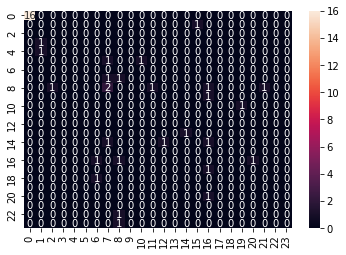

In [104]:
#Plotting confusion matrix
cm = confusion_matrix(Y_test,pred1)
f = sns.heatmap(cm, annot=True, fmt='d')

# Define DecisionTreeRegressor Model

In [95]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train , Y_train)

DecisionTreeRegressor()

# Test Model

In [96]:
pred1 = dtr.predict(X_test)
pred1

array([275000., 240000., 250000., 236000.,      0.,      0., 236000.,
       240000., 300000.,      0., 300000.,      0.,      0., 450000.,
       250000., 240000.,      0., 360000.,      0., 200000., 250000.,
            0., 265000., 264000.,      0.,      0., 276000.,      0.,
            0., 300000., 350000., 260000., 240000., 300000.,      0.,
            0., 200000., 204000.,      0.,      0., 250000., 300000.,
       240000.])

In [97]:
Y_test

151    270000.0
66     275000.0
117    240000.0
96     300000.0
109         0.0
93          0.0
74     336000.0
55     220000.0
185    252000.0
161         0.0
154    250000.0
31          0.0
188         0.0
121    250000.0
160    300000.0
133    250000.0
155         0.0
147    300000.0
91          0.0
88     210000.0
119    940000.0
65          0.0
211    275000.0
48     250000.0
41          0.0
181         0.0
50     200000.0
34          0.0
175         0.0
69     275000.0
33     260000.0
139    220000.0
114    250000.0
37     320000.0
25          0.0
169         0.0
54     216000.0
2      250000.0
12          0.0
144         0.0
177    650000.0
22     360000.0
166    240000.0
Name: salary, dtype: float64

# Evaluate

In [98]:
rmse1 = np.sqrt(mean_squared_error(Y_test,pred1))
r21 = r2_score(Y_test,pred1)

In [99]:
rmse1,r21

(129930.12433343673, 0.522895107198714)

In [100]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,pred1)
print(cm)


[[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  2  0  0  0  1  0  0  0  0  1  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

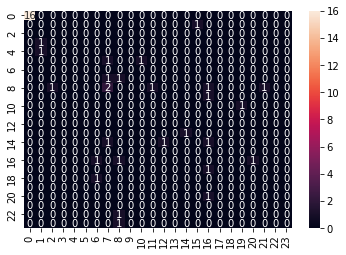

In [101]:
#Plotting confusion matrix
cm = confusion_matrix(Y_test,pred1)
f = sns.heatmap(cm, annot=True, fmt='d')

In [105]:
#Accuracy Score
accuracy_score(Y_test, pred1)

0.3953488372093023

In [109]:
#f1 Score
f1_score(Y_test,pred1,average='weighted')

0.3853820598006645